## What factors are driving pay discrimination between men and women in your organization?##



In [11]:
#import libraries
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm

import os

%matplotlib inline
plt.style.use('ggplot')

**Business Context**. You are a data scientist in a large organization. Your company is undergoing an internal review of its hiring practices and employee compensation. In recent years, your firm has had low success in converting high-quality female candidates that it has wanted to hire. Management hypothesizes that this is due to possible pay discrimination and wants to figure out what is causing it.

**Business Problem.** As part of the internal review, the human resources department has approached you to specifically investigate the following question: <b>"On balance, are men paid more than women in your organization? If so, what is driving this gap?"</b>

**Analytical Context**. The human resources department has provided you with an employee database that contains information on various attributes such as performance, education, income, seniority, etc. We will use linear regression techniques on this dataset to solve the business problem described above. We will see how linear regression quantifies the correlation between the dependent variable (pay) and the independent variables (e.g. education, income, seniority, etc.)

The case is structured as follows: we will (1) perform exploratory data analysis to visually investigate the differences in pay; (2) use the observed insights to formally fit regression models; and finally (3) address the pay discrimination issue.

## Data Exploration (30 mts)

In [12]:
Data = pd.read_csv('glassdoordata.csv')
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


The available features are:
* **Job Title**: the title of the job (e.g. “Graphic Designer”, “Software Engineer”, etc);
* **Gender**: male or female;
* **Age**: age;
* **Performance**: on a scale of 1 to 5, 1 being the lowest and 5 being the highest;
* **Education**: different levels of education (e.g. "College", "PhD", "Masters", "Highschool");
* **Department**: different departments in the organization (e.g. "Operations", "Management", etc);
* **Seniority**: on a scale of 1 to 5, 1 being the lowest and 5 being the highest;
* **Income, bonus**: both expressed in dollars

Since we are interested in total compensation, let's create a new column called <code>pay</code>:

In [13]:
Data['pay'] = Data['income'] + Data['bonus']

In [5]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


###  Explore the data


Let's construct a boxplot comparing pay between men and women. 
What can you conclude?


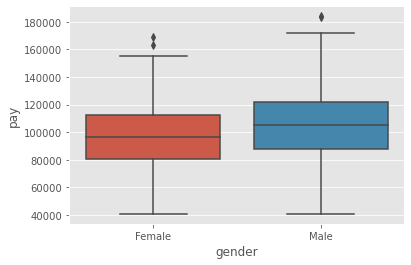

In [14]:
# Write code here
sns.boxplot(x='gender', y='pay',data=Data)

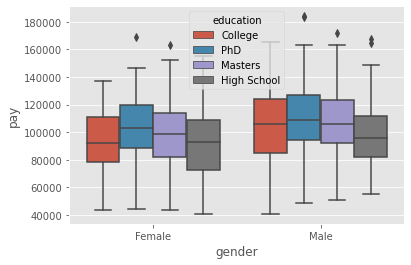

In [5]:
sns.boxplot(x='gender', y='pay',data=Data,hue='education')

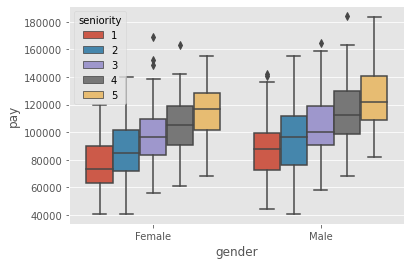

In [6]:
sns.boxplot(x='gender', y='pay',data=Data,hue='seniority')

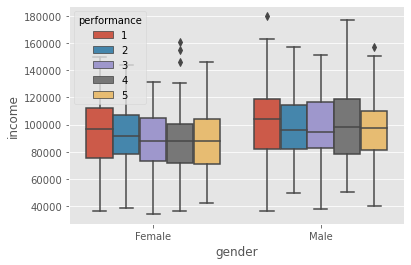

In [7]:
sns.boxplot(x='gender', y='income',data=Data,hue='performance')

### Correlation matrix
To find the variables that have the greatest influence on pay, we can compute a <b>correlation matrix</b> which measures the pairwise correlations between any two variables:

In [8]:
corr_mat  = Data[['pay', 'age', 'seniority','performance']].corr()
corr_mat

,pay,age,seniority,performance
pay,1.000000,0.533715,0.530307,0.014155
age,0.533715,1.000000,-0.021414,-0.056875
seniority,0.530307,-0.021414,1.000000,-0.021127
performance,0.014155,-0.056875,-0.021127,1.000000


We can also visualize the correlation matrix above as a heatmap:

Text(0.5, 1.0, 'Correlation Matrix')

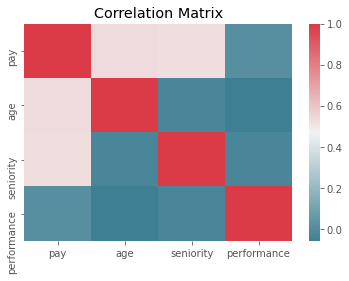

In [9]:
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

## Using linear models to account for variables correlated with pay

Once we identify some independent variables that are correlated with the dependent variable, a linear model can be used to capture this relationship quantitatively. A linear model does this by finding a line that **best fits** the data points:


Text(-15.450000000000003, 0.5, 'Pay')

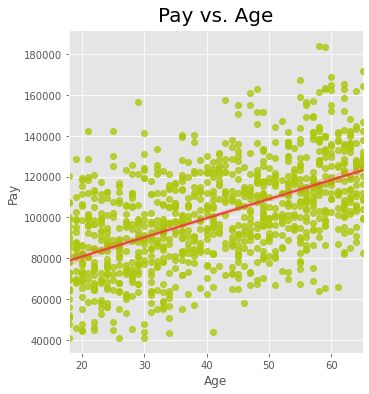

In [15]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay")

A line has two parameters – intercept ($\theta_0$) and slope ($\theta_1$). Thus a linear model for pay vs. age can be represented as
 $$ \mathrm{pay} = \theta_0 + \theta_1 \times \mathrm{age} + \mathrm{error}. $$

The interpretation of the coefficient $\theta_1$ is the following: an increase of one year in age will on average lead to a change of $\theta_1$ USD in pay. The intercept $\theta_0$ can be thought of as a sort of "baseline" pay.

## level-level model ##
<img src="img/linear_model.png" width="200">


## log-level model ##
<img src="img/log_linear_model.png" width="250">

Typically we use log transformation to pull outlying data from a positively skewed distribution closer to the bulk of the data, in order to make the variable normally distributed. In the case of linear regression, one additional benefit of using the log transformation is interpretability.

<img src="img/log_data.png" width="250">

$\log(y) = 3 + 0.001 \times x$

Intercept

Interpretation is similar as in the vanilla (level-level) case, however, we need to take the exponent of the intercept for interpretation exp(3) = 20.09. The difference is that this value stands for the geometric mean of y (as opposed to the arithmetic mean in case of the level-level model).

Coefficient 


The principles are again similar to the level-level model when it comes to interpreting categorical/numeric variables. Analogically to the intercept, we need to take the exponent of the coefficient: exp(b) = exp(0.01) = 1.01. This means that a unit increase in x causes a 1% increase in average (geometric) y, all other variables held constant.

## level - log model
<img src="img/linear_log_model.png" width="250">

$y = 3 +5 \times \log(x)$

The interpretation of the intercept is the same as in the case of the level-level model.

For the coefficient b — a 1% increase in x results in an approximate increase in average y by b/100 (0.05 in this case), all other variables held constant. To get the exact amount, we would need to take b× log(1.01), which in this case gives 0.0498.



## Interpreting the output of a linear model

The linear model of pay vs. age can be fit as follows:

In [32]:

lm1   = sm.ols(formula = 'pay~age', data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Fri, 13 Aug 2021   Prob (F-statistic):           1.04e-74
Time:                        20:52:54   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.0

In [17]:
lm1   = sm.ols(formula = 'pay~age+seniority', data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     684.1
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          9.56e-188
Time:                        20:48:33   Log-Likelihood:                -11119.
No. Observations:                1000   AIC:                         2.224e+04
Df Residuals:                     997   BIC:                         2.226e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.218e+04   1948.532     16.514      0.0

In [18]:
lm1   = sm.ols(formula = 'np.log(pay)~age', data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(pay)   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     387.2
Date:                Fri, 13 Aug 2021   Prob (F-statistic):           4.32e-73
Time:                        20:50:41   Log-Likelihood:                 77.520
No. Observations:                1000   AIC:                            -151.0
Df Residuals:                     998   BIC:                            -141.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0851      0.022    510.271      0.0

### What should we focus on in the regression table? 
Although the output table above contains a lot of information, we only need to focus on a small number of quantities.
These are the coefficients (the estimates of $\beta_0$ and $\beta_1$), as well as their $p$- and $R$-squared values.

### Coefficients
The intercept $\beta_0$ is about 62060 USD. This can be thought of as the baseline pay. (Frequently, the intercept does not have a meaningful interpretation – that is okay.) The slope (the coefficient $\beta_1$ for the age) is 939.25. The interpretation of this coefficient is as explained before: if an employee becomes one year older, his or her pay is expected to increase by 939.25 USD on average. 

### $p$-values
The null hypothesis we are testing here is 
$$ H_0:  \beta_1 = 0 $$ 
and the alternative is
$$ H_a: \beta_1 \neq 0.$$
The p-value of $\beta_1$ (given under the column: $"P>|t|"$) is 0.000.  Thus, it is statistically significant at the 0.05 level, and we reject the null hypothesis. This implies that age does explain some of the differences in pay.

## $R$-squared (15 mts)
One of the key quantities that should be paid attention to while interpreting a regression table is the quantity
$R$-squared. Note that the table shows $R$-squared and adjusted $R$-squared. We will focus on $R$-squared. This quantity is always going to be between 0 and 1. For the pay vs. age model, this quantity is 0.285 = 28.5%. In this organization, there is a large variation in pay – different employees are paid different amounts.

An $R$-squared of 28.5% in this linear model means that this observed variation in pay is not due to random chance; rather, the age factor systematically explains 28.5% of this variation in pay. The higher the $R$-squared, the higher the percentage of observed variation that can be explained by the model. Since <code>model1</code> only explains about 28.5% of the variation, this motivates us to investigate if factors other than age can be used to explain the pay differences.

### Relation between correlation and $R$-squared

In [19]:
corr_age_pay = np.corrcoef(Data['pay'],Data['age'])[0,1]
corr_age_pay*corr_age_pay

0.2848512885110829

### Geometric interpretation of $R$-Squared
The formula for $R$-squared is the following:
  $$ R^2 = 1 - \frac{\mathrm{RSS}}{\mathrm{TSS}} $$
Here **RSS** and **TSS** denote the Residual and Total Sum of Squares respectively. To understand the above
formula carefully, let us plot pay vs. age again. 

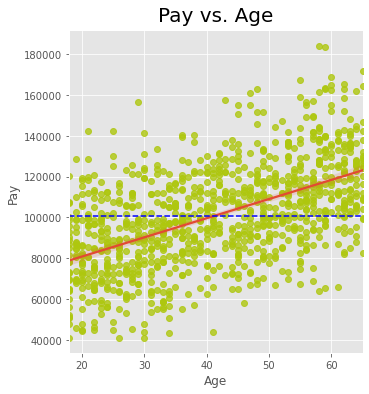

In [28]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.axhline(Data['pay'].mean(), ls='--',color = 'b')
plt.xlabel("Age")
plt.ylabel("Pay");

Consider the naive <code>model0</code> given by
 $$ \mathrm{pay} = \theta_0 + \mathrm{error} $$
The best guess for $\theta_0$ is just the average pay. This is given by the blue line. The sum of the squares of the residuals here is called the Total Sum of Squares (TSS).
R-squared measures how well the regression line of <code>model1</code> (pay vs. age) given by the red line explains the observed variation as compared to <code>model0</code>. The sum of residual squares for this model is the RSS.

### Calculating $R$-Squared by writing code

In [33]:
# you can 'peek' inside the object lm1 using the dir command
dir(lm1)
# for instance if you want to know what the fitted values are
## lm.fittedvalues

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [34]:
## Write code to find residuals from fitted values
res = Data['pay'] - lm1.fittedvalues
res[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [35]:
## check if this is the same as that stored in lm1.resid
lm1.resid[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [36]:
# The mean for pay 
mean_pay = Data['pay'].mean()

## The total sum of squares:
TSS = sum((Data['pay'] - mean_pay)*(Data['pay'] - mean_pay))
TSS

## Residual sum of squares
RSS = sum(res*res)

In [37]:
R_squared = (TSS - RSS)/TSS
R_squared

0.28485128851108443

## Integrated model accounting more than one variable

Let us account for all the other factors that could explain pay gaps at once. What can you conclude?:

In [24]:
model2 = 'pay~ age + performance  + seniority '
lm2    = sm.ols(formula = model2, data = Data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     461.7
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          6.23e-188
Time:                        11:28:58   Log-Likelihood:                -11116.
No. Observations:                1000   AIC:                         2.224e+04
Df Residuals:                     996   BIC:                         2.226e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.882e+04   2289.220     12.591      

## Looking at age and gender: Categorical variables (10 mts)

Now that we have seen that age explains some of the relationship with pay, let us consider a model in which we take age and gender into account simultaneously. Age is a numeric variable (e.g., 26.5, 32). In contrast, gender takes only two values – male and female. Such variables are called <b>categorical variables</b>. The way we interpret the coefficients of factor variables in the linear model is slightly different from those of numeric variables:

In [38]:
model2 = 'pay ~ age + gender'
lm2    = sm.ols(formula = model2, data = Data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Fri, 13 Aug 2021   Prob (F-statistic):           8.10e-84
Time:                        20:53:54   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

The interpretation of the coefficient of age is the same as before: if age increases by one year, the pay is expected to increase by 948.5 USD. Now, focus on the coefficient of gender. It shows male (T.male) only, because the category female is taken as the default category. (Note that the choice of default category doesn't matter – we could easily have chosen to make male the default category and hence the coefficient for gender would be T.female.) The coefficient 9279.3180 is interpreted as follows: for employees of the same age, on average, men make 9279.3180 USD more than women.

But we still haven't satisfactorily answered our main question yet. So far, we have only accounted for age in addition to gender for explaining pay gaps. There are still a few more factors that could affect pay. We consider education next. The following plot shows that employees with at least a college education are paid more:

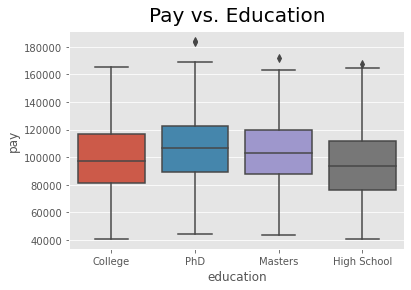

In [39]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

# How should we price homes in Seattle?

## Data exploration (15 mts)

Let's start by reviewing the columns of the dataset and what they mean:

1. **id**: identification for a house
2. **date**: date house was sold
3. **price**: price house was sold at
4. **bedrooms**: number of bedrooms
5. **bathrooms**: number of bathrooms
6. **sqft_living**: square footage of the home
7. **sqft_lot**: square footage of the lot
8. **floors**: total floors (levels) in house
9. **waterfront**: whether or not the house has a view of a waterfront
10. **view**: whether or not the house has been viewed
11. **condition**: how good the condition of the house is
12. **grade**: overall grade given to the housing unit, based on King County grading system
13. **sqft_above**: square footage of the house apart from basement
14. **sqft_basement**: square footage of the basement
15. **yr_built**: year house was built
16. **yr_renovated**: year house was renovated
17. **zipcode**: zipcode of the house
18. **lat**: latitude coordinate of the house
19. **long**: longitude coordinate of the house

In [26]:
houses = pd.read_csv('kc_house_data.csv')

In [27]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Analyze the distribution of house prices using `.describe()`, and a histogram plot. Does it look Gaussian?

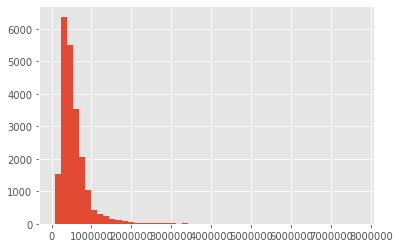

In [30]:
# Write code here
plt.hist(houses['price'],50);

In [29]:
houses['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64



Analyze the relationship between house prices and price per square foot of living space. What can you conclude? (Hint: use the `lmplot()` function in the `seaborn` library.)

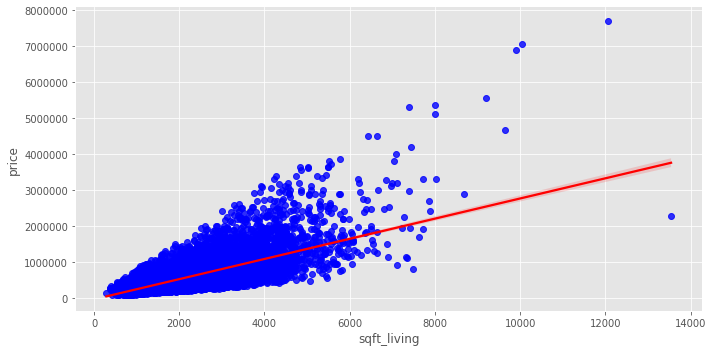

In [31]:
# Write code here
sns.lmplot(x='sqft_living', y='price', data=houses, line_kws={'color':'red'},aspect=2,scatter_kws={'color':'blue'} )

## Variable transformation 

We have seen in Exercise 1 that the distribution of house prices is not Gaussian, and that this may be contributing to the "fanning out" effect we observed in Exercise 2. We want to find a way to remove the "fanning out" effect, as it implies that a linear fit becomes less and less suitable, with higher and higher variance from the line of best fit for large values of the predictor and response variables. A common method of addressing this issue is to transform the response variable and/or the predictor variable. Such a **variable transformation** involves applying a known function to one or more of these variables to achieve conditions that are suitable for the application of a linear model.

Typical mathematical functions used to transform variables include powers (quadratic, cubic, square root, etc.), logarithms, and trigonometric functions. Let's start with the logarithmic transformation to see if we can achieve some results.

### Take the logarithm of house prices and create plots to ascertain if this makes the distribution of the transformed variable roughly Gaussian.

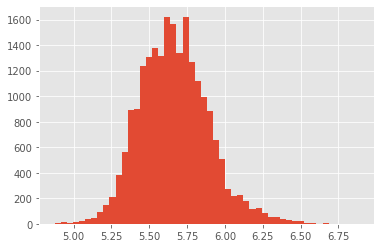

In [32]:
# Write code here
#sns.distplot(np.log10(houses['price']));
plt.hist(np.log10(houses['price']),50);

### Building a linear model with transformed variables (15 mts)

Of course, we aren't just restricted to applying the logarithmic transformation to house prices; we can do it to any other variable in our dataset. Let's transform both house prices and price per square foot by this method and interpret the resulting linear model:

In [34]:
mod1 = sm.ols(formula='np.log(price) ~ np.log(sqft_living)', data=houses).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:55:43   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7299    

We have to be mindful of how we interpret the coefficients. Although we could say that our results tell us that a 1 unit increase in the logarithm of living space will result in a 0.836 increase in the logarithm of the price, this is a very mechanical and not at all intuitive interpretation.

Mathematics can help us come up with a more intuitive interpretation. Note that the fit our above model has come up with is $ \log price = 0.84 * \log sqft\_living + 6.73$. Exponentiating both sides, we get $price = e^{6.73} * sqft\_living^{0.84}$. This is a nonlinear relationship, so it's not as straightforward as "increasing `sqft_living` by 1 means that `price` goes up by X".

However, we can try reframing this in percentage terms; i.e. how does a 1 percent increase in `sqft_living` affect price? We can plug $sqft\_living_0 = 1.01 * sqft\_living$ into this equation to get $price_0 = e^{6.73} * 1.01^{0.84} * sqft\_living^{0.84} = 1.01^{0.84} * price \approx 1.0084 * price$; i.e. a 1 percent increase in living space results in a 0.84 percent increase in price. This percentage vs. percentage change comparison is known as **elasticity**.

Let's now build a linear model where the logarithmic transform is only applied to the house prices:

In [35]:
mod2 = sm.ols(formula='np.log(price) ~ sqft_living', data=houses).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:55:52   Log-Likelihood:                -9670.2
No. Observations:               21613   AIC:                         1.934e+04
Df Residuals:                   21611   BIC:                         1.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2185      0.006   1916.883      

The interpretation of the regression coefficient is once again different. We interpret the coefficient as a **semi-elasticity**, where an absolute increase in `sqft_living` (because it has not had the logarithm function applied to it) corresponds to a percentage increase `price`. Specifically, here we can say that an increase in living space by 1 square foot leads to a 0.04% percent increase in price.

### Exercise 4: (10 mts)

Using the `sns.lmplot()` function, determine which of the above two models is "more linear".

**Answer:**

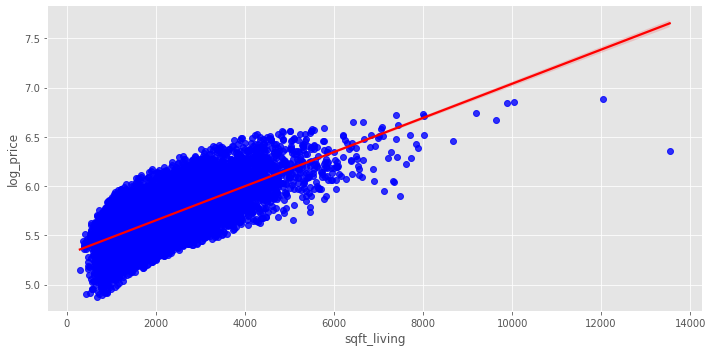

In [36]:
# Write code here
houses['log_price']=np.log10(houses['price'])
sns.lmplot(x='sqft_living', y='log_price', data=houses, line_kws={'color':'red'},aspect=2,scatter_kws={'color':'blue'} )

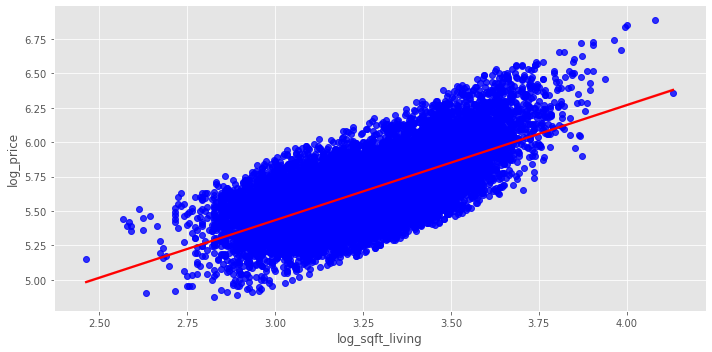

In [37]:
houses['log_sqft_living']=np.log10(houses['sqft_living'])
sns.lmplot(x='log_sqft_living', y='log_price', data=houses, line_kws={'color':'red'},aspect=2,scatter_kws={'color':'blue'} )